In [95]:
DATA_PATH = "https://github.com/dattali18/machine_learning_msc_project/blob/main/db/heart.csv?raw=true"

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# for bagging
# The basic (weak) model
from sklearn.ensemble import BaggingClassifier
# The envelope that surrounds many such models
from sklearn.tree import DecisionTreeClassifier
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Boosting
from sklearn.ensemble import AdaBoostClassifier

In [97]:
heart_data = pd.read_csv(DATA_PATH)

In [98]:
heart_data.T

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
age,52.0,53.0,70.0,61.0,62.0,58.0,58.0,55.0,46.0,54.0,...,58.0,65.0,53.0,41.0,47.0,59.0,60.0,47.0,50.0,54.0
sex,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
trestbps,125.0,140.0,145.0,148.0,138.0,100.0,114.0,160.0,120.0,122.0,...,128.0,138.0,123.0,110.0,112.0,140.0,125.0,110.0,110.0,120.0
chol,212.0,203.0,174.0,203.0,294.0,248.0,318.0,289.0,249.0,286.0,...,216.0,282.0,282.0,172.0,204.0,221.0,258.0,275.0,254.0,188.0
fbs,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
restecg,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
thalach,168.0,155.0,125.0,161.0,106.0,122.0,140.0,145.0,144.0,116.0,...,131.0,174.0,95.0,158.0,143.0,164.0,141.0,118.0,159.0,113.0
exang,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
oldpeak,1.0,3.1,2.6,0.0,1.9,1.0,4.4,0.8,0.8,3.2,...,2.2,1.4,2.0,0.0,0.1,0.0,2.8,1.0,0.0,1.4


#Target variable
*   target = 1 → Heart disease
*   target = 0 → No heart disease

#Features (examples):
*   age – age in years
*   sex – 1 = male, 0 = female
*   cp – chest pain type
*   trestbps – resting blood pressure
*   chol – serum cholesterol
*   thalach – max heart rate achieved
*   exang – exercise-induced angina
*   oldpeak – ST depression
*   ca – number of major vessels
*   thal – thalassemia


*   X – the input (features)
*   y – the output (label / target)

In [99]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

#Train–Test Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(     X, y, test_size=0.2, random_state=42, stratify=y )

#Feature Scaling


למה

In [101]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Bagging
What you are shown is the model built in memory after fit
A hierarchical structure of the model is shown:

▶ BaggingClassifier

 ⬇ Contains

▶ Many DecisionTreeClassifier

This is exactly the idea of ​​Bagging.

Instead of one smart tree → many simple trees that point


*More trees = more stability (up to a certain limit)*

In [116]:
# Create Bagging model
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),   # Base model: Decision Tree
    n_estimators=10,                      # 10 trees
    max_samples=0.8,                      # each tree trains on 80% of training rows (bootstrap)
    max_features=1.0,                     # each tree sees 100% of features
    random_state=42
)

# Train
bagging_model.fit(X_train, y_train)

# Predict
y_pred_bagging = bagging_model.predict(X_test)
y_true = y_test

What's going on behind the scenes here?


1.   100 different samples are generated from the train
2.  A Decision Tree is trained on each sample
3.  Each tree learns on its own
4.  The model stores all the trees

#Evaluation for bagging

In [126]:
# Metrics
accuracy  = accuracy_score(y_true, y_pred_bagging)
precision = precision_score(y_true, y_pred_bagging)
recall    = recall_score(y_true, y_pred_bagging)
f1        = f1_score(y_true, y_pred_bagging)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

Accuracy : 0.975609756097561
Precision: 1.0
Recall   : 0.9523809523809523
F1-score : 0.975609756097561


In [135]:
def plot_medical_confusion_matrix(model, X_test, y_test, title):
    # Predictions
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Reds',
        cbar=False,
        annot_kws={"size": 16}
    )

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)

    # Medical-style annotations (binary: 0=Healthy, 1=Disease)
    plt.text(0.5, 0.2, "Healthy Correctly\nIdentified (TN)",
             ha="center", va="center", color="black", fontsize=11)

    plt.text(1.5, 0.2, "False Alarm\n(Type I Error) (FP)",
             ha="center", va="center", color="black", fontsize=11)

    plt.text(0.5, 1.2, "MISSED DIAGNOSIS\n(Type II Error – Dangerous!) (FN)",
             ha="center", va="center", color="white", fontsize=11)

    plt.text(1.5, 1.2, "Disease Correctly\nIdentified (TP)",
             ha="center", va="center", color="white", fontsize=11)

    plt.show()


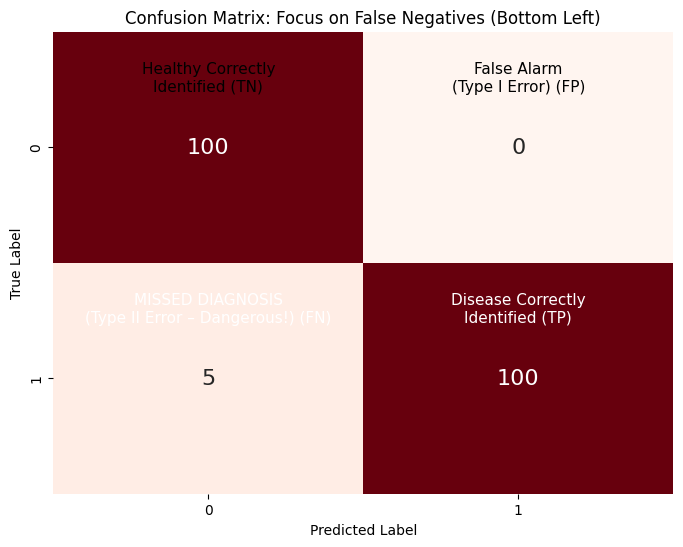

In [136]:
plot_medical_confusion_matrix(
    bagging_model,
    X_test,
    y_test,
    title="Confusion Matrix: Focus on False Negatives (Bottom Left)"
)

# Bagging with Gini Impurity Criterion

Let's train a Bagging Classifier where the base estimator is a Decision Tree that uses the Gini impurity for splitting. This is the default criterion for DecisionTreeClassifier.

In [118]:
# 1) Create the Bagging model (with DecisionTree using Gini)
bagging_gini = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion="gini",
        # Limits tree depth to 5 → helps reduce overfitting.
        max_depth=5,
        # The tree will not split if there are fewer than 10 examples at the node → less than a “perfect” match.
        min_samples_split=10,
        # Each leaf must contain at least 5 samples → helps greatly against overfitting.
        min_samples_leaf=5
    ),
    # Number of trees in the ensemble
    n_estimators=50,
    random_state=42
)

# 2) Train the model
bagging_gini.fit(X_train, y_train)

# 3) Predict on test set
y_pred_bagging_gini = bagging_gini.predict(X_test)

# 4) Print results
print("Bagging + Gini")
print("Accuracy :", accuracy_score(y_test, y_pred_bagging_gini))
print("Precision:", precision_score(y_test, y_pred_bagging_gini))
print("Recall   :", recall_score(y_test, y_pred_bagging_gini))
print("F1-score :", f1_score(y_test, y_pred_bagging_gini))


Bagging + Gini
Accuracy : 0.926829268292683
Precision: 0.9017857142857143
Recall   : 0.9619047619047619
F1-score : 0.9308755760368663


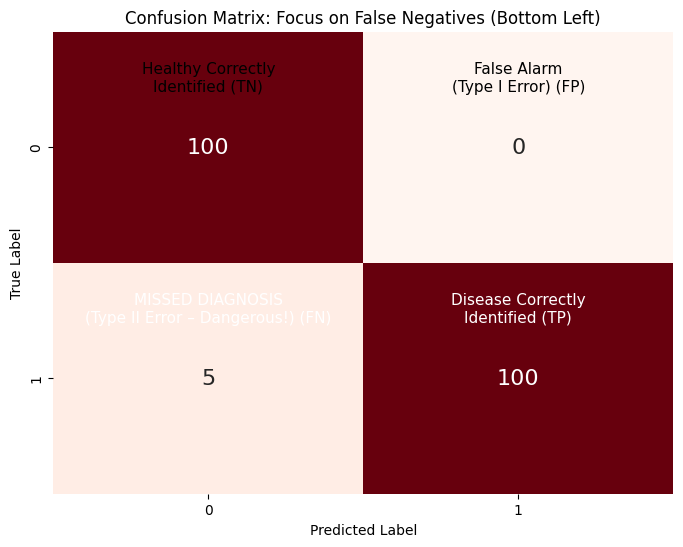

In [137]:
plot_medical_confusion_matrix(
    bagging_model,
    X_test,
    y_test,
    title="Confusion Matrix: Focus on False Negatives (Bottom Left)"
)

# Bagging with Entropy (Information Gain) Criterion

Now, let's train another Bagging Classifier, but this time using a Decision Tree that splits nodes based on the Entropy (information gain) criterion.

In [119]:
bagging_entropy = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion="entropy"
    ),
    n_estimators=10,   # 10 trees
    max_samples=0.8,
    max_features=1.0,
    random_state=42
)

bagging_entropy.fit(X_train, y_train)
# Generates predictions for the test set: this is a vector of 0/1.
y_pred_bagging_Entropy = bagging_entropy.predict(X_test)

print("Bagging + Entropy")
# How many percent of the total did we guess correctly
print("Accuracy :", accuracy_score(y_test, y_pred_bagging_Entropy))
# Of those we classified as sick (1), how many were actually sick
print("Precision:", precision_score(y_test, y_pred_bagging_Entropy))
# Of the real sick (1), how many were we able to detect
print("Recall   :", recall_score(y_test, y_pred_bagging_Entropy))
# Harmonic average of precision and recall.
print("F1-score :", f1_score(y_test, y_pred_bagging_Entropy))

Bagging + Entropy
Accuracy : 0.9902439024390244
Precision: 1.0
Recall   : 0.9809523809523809
F1-score : 0.9903846153846154


# Boosting

Boosting:

Models are trained sequentially

Each new model focuses on previous mistakes

Final prediction = weighted vote

📌 Reduces bias and improves accuracy

🔹 Boosting Model Choice

We’ll use: AdaBoost *(classic and easy to explain)*

In [121]:
boosting_model = AdaBoostClassifier(
    n_estimators=10,
    # How much “weight” is given to each new model. Smaller = slower and more careful learning (sometimes helps against overfitting).
    learning_rate=0.1,
    random_state=42
)

boosting_model.fit(X_train, y_train)

y_pred_boosting = boosting_model.predict(X_test)


# Evaluation for boosting

In [122]:
y_true = y_test

accuracy = accuracy_score(y_true,  y_pred_boosting)
precision = precision_score(y_true,  y_pred_boosting)
recall = recall_score(y_true,  y_pred_boosting)
f1 = f1_score(y_true,  y_pred_boosting)

# How many percent of the total we guessed correctly.
print("Accuracy :", accuracy)
# Of those we classified as sick (1), how many are really sick.
print("Precision:", precision)
# Of the real sick (1), how many were we able to detect.
print("Recall   :", recall)
# Harmonic average of precision and recall.
print("F1-score :", f1)

Accuracy : 0.775609756097561
Precision: 0.7565217391304347
Recall   : 0.8285714285714286
F1-score : 0.7909090909090909


### Boosting with Gini Impurity Criterion

Let's train a Boosting Classifier where the base estimator is a Decision Tree that uses the Gini impurity for splitting. This is the default criterion for DecisionTreeClassifier.

In [108]:
boosting_gini = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        criterion="gini",
        # Limits tree depth to 3 → helps reduce overfitting.
        max_depth=3,
        random_state=42
    ),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

boosting_gini.fit(X_train, y_train)
y_pred_boost_gini = boosting_gini.predict(X_test)

print("Boosting (AdaBoost) + Gini")
# How many percent of the total we guessed correctly.
print("Accuracy :", accuracy_score(y_test, y_pred_boost_gini))
# Of those we classified as sick (1), how many are really sick.
print("Precision:", precision_score(y_test, y_pred_boost_gini))
# Of the real sick (1), how many were we able to detect.
print("Recall   :", recall_score(y_test, y_pred_boost_gini))
# Harmonic average of precision and recall.
print("F1-score :", f1_score(y_test, y_pred_boost_gini))

Boosting (AdaBoost) + Gini
Accuracy : 0.9317073170731708
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1-score : 0.9333333333333333


### Boosting with Entropy (Information Gain) Criterion

Now, let's train another Boosting Classifier, but this time using a Decision Tree that splits nodes based on the Entropy (information gain) criterion.

In [109]:
boosting_model_entropy = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(
        criterion="entropy",
        # Limits tree depth to 5 → helps reduce overfitting.
        max_depth=5,
        random_state=42
    ),
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

boosting_model_entropy.fit(X_train, y_train)

y_pred_boosting_entropy = boosting_model_entropy.predict(X_test)

boosting_accuracy_entropy = accuracy_score(y_test, y_pred_boosting_entropy)
boosting_precision_entropy = precision_score(y_test, y_pred_boosting_entropy)
boosting_recall_entropy = recall_score(y_test, y_pred_boosting_entropy)
boosting_f1_entropy = f1_score(y_test, y_pred_boosting_entropy)

print("--- Boosting with Entropy (Information Gain) ---")
print("Accuracy :", boosting_accuracy_entropy)
print("Precision:", boosting_precision_entropy)
print("Recall   :", boosting_recall_entropy)
print("F1-score :", boosting_f1_entropy)

--- Boosting with Entropy (Information Gain) ---
Accuracy : 0.9902439024390244
Precision: 0.9813084112149533
Recall   : 1.0
F1-score : 0.9905660377358491


### Comparison of Models

Let's summarize the performance of the different models we've trained:

In [110]:
print("Bagging with Default (Gini) Decision Trees:")
print(f"Accuracy: {accuracy_gini:.4f}, Precision: {precision_gini:.4f}, Recall: {recall_gini:.4f}, F1-score: {f1_gini:.4f}")
print("\nBagging with Entropy Decision Trees:")
print(f"Accuracy: {accuracy_entropy:.4f}, Precision: {precision_entropy:.4f}, Recall: {recall_entropy:.4f}, F1-score: {f1_entropy:.4f}")
print("\nAdaBoost Classifier:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Bagging with Default (Gini) Decision Trees:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Bagging with Entropy Decision Trees:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

AdaBoost Classifier:
Accuracy: 0.8780, Precision: 0.8636, Recall: 0.9048, F1-score: 0.8837


### Correlation Heatmap

Let's visualize the correlation matrix of the features using a heatmap. This helps in understanding the linear relationships between variables.

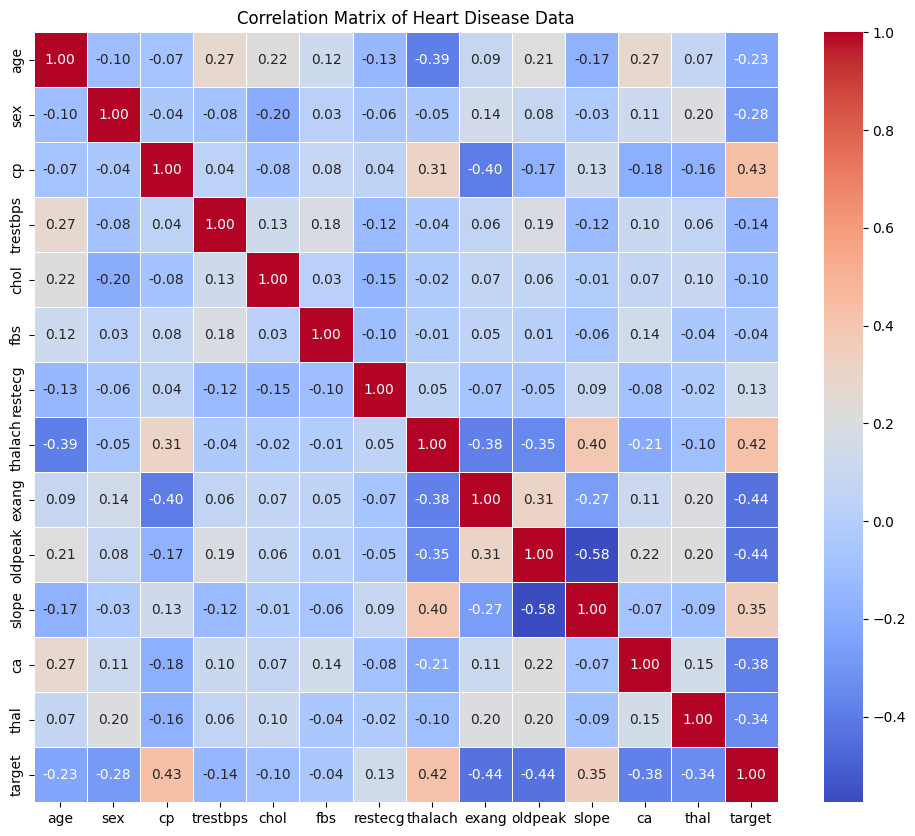

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Heart Disease Data')
plt.show()

### Distribution of Numerical Features

Next, let's look at the distribution of some key numerical features like 'age', 'trestbps', 'chol', and 'thalach'.

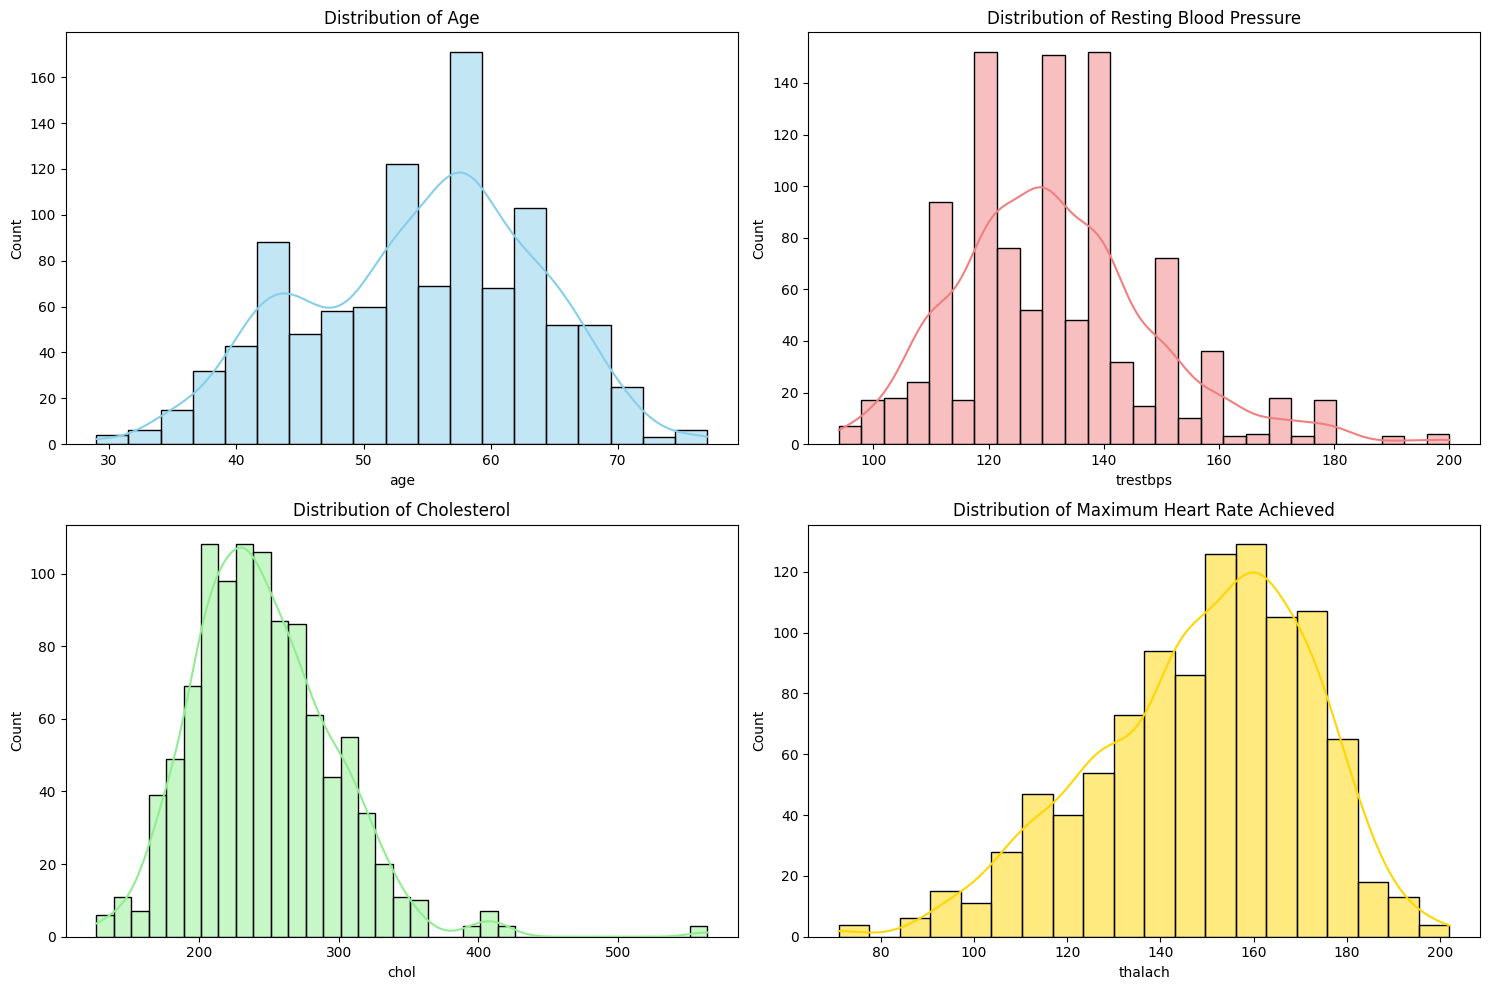

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(heart_data['age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')

sns.histplot(heart_data['trestbps'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Distribution of Resting Blood Pressure')

sns.histplot(heart_data['chol'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Cholesterol')

sns.histplot(heart_data['thalach'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Maximum Heart Rate Achieved')

plt.tight_layout()
plt.show()

### Count Plots for Categorical Features vs. Target

Now, let's visualize the distribution of some categorical features and how they relate to the 'target' variable (presence of heart disease).

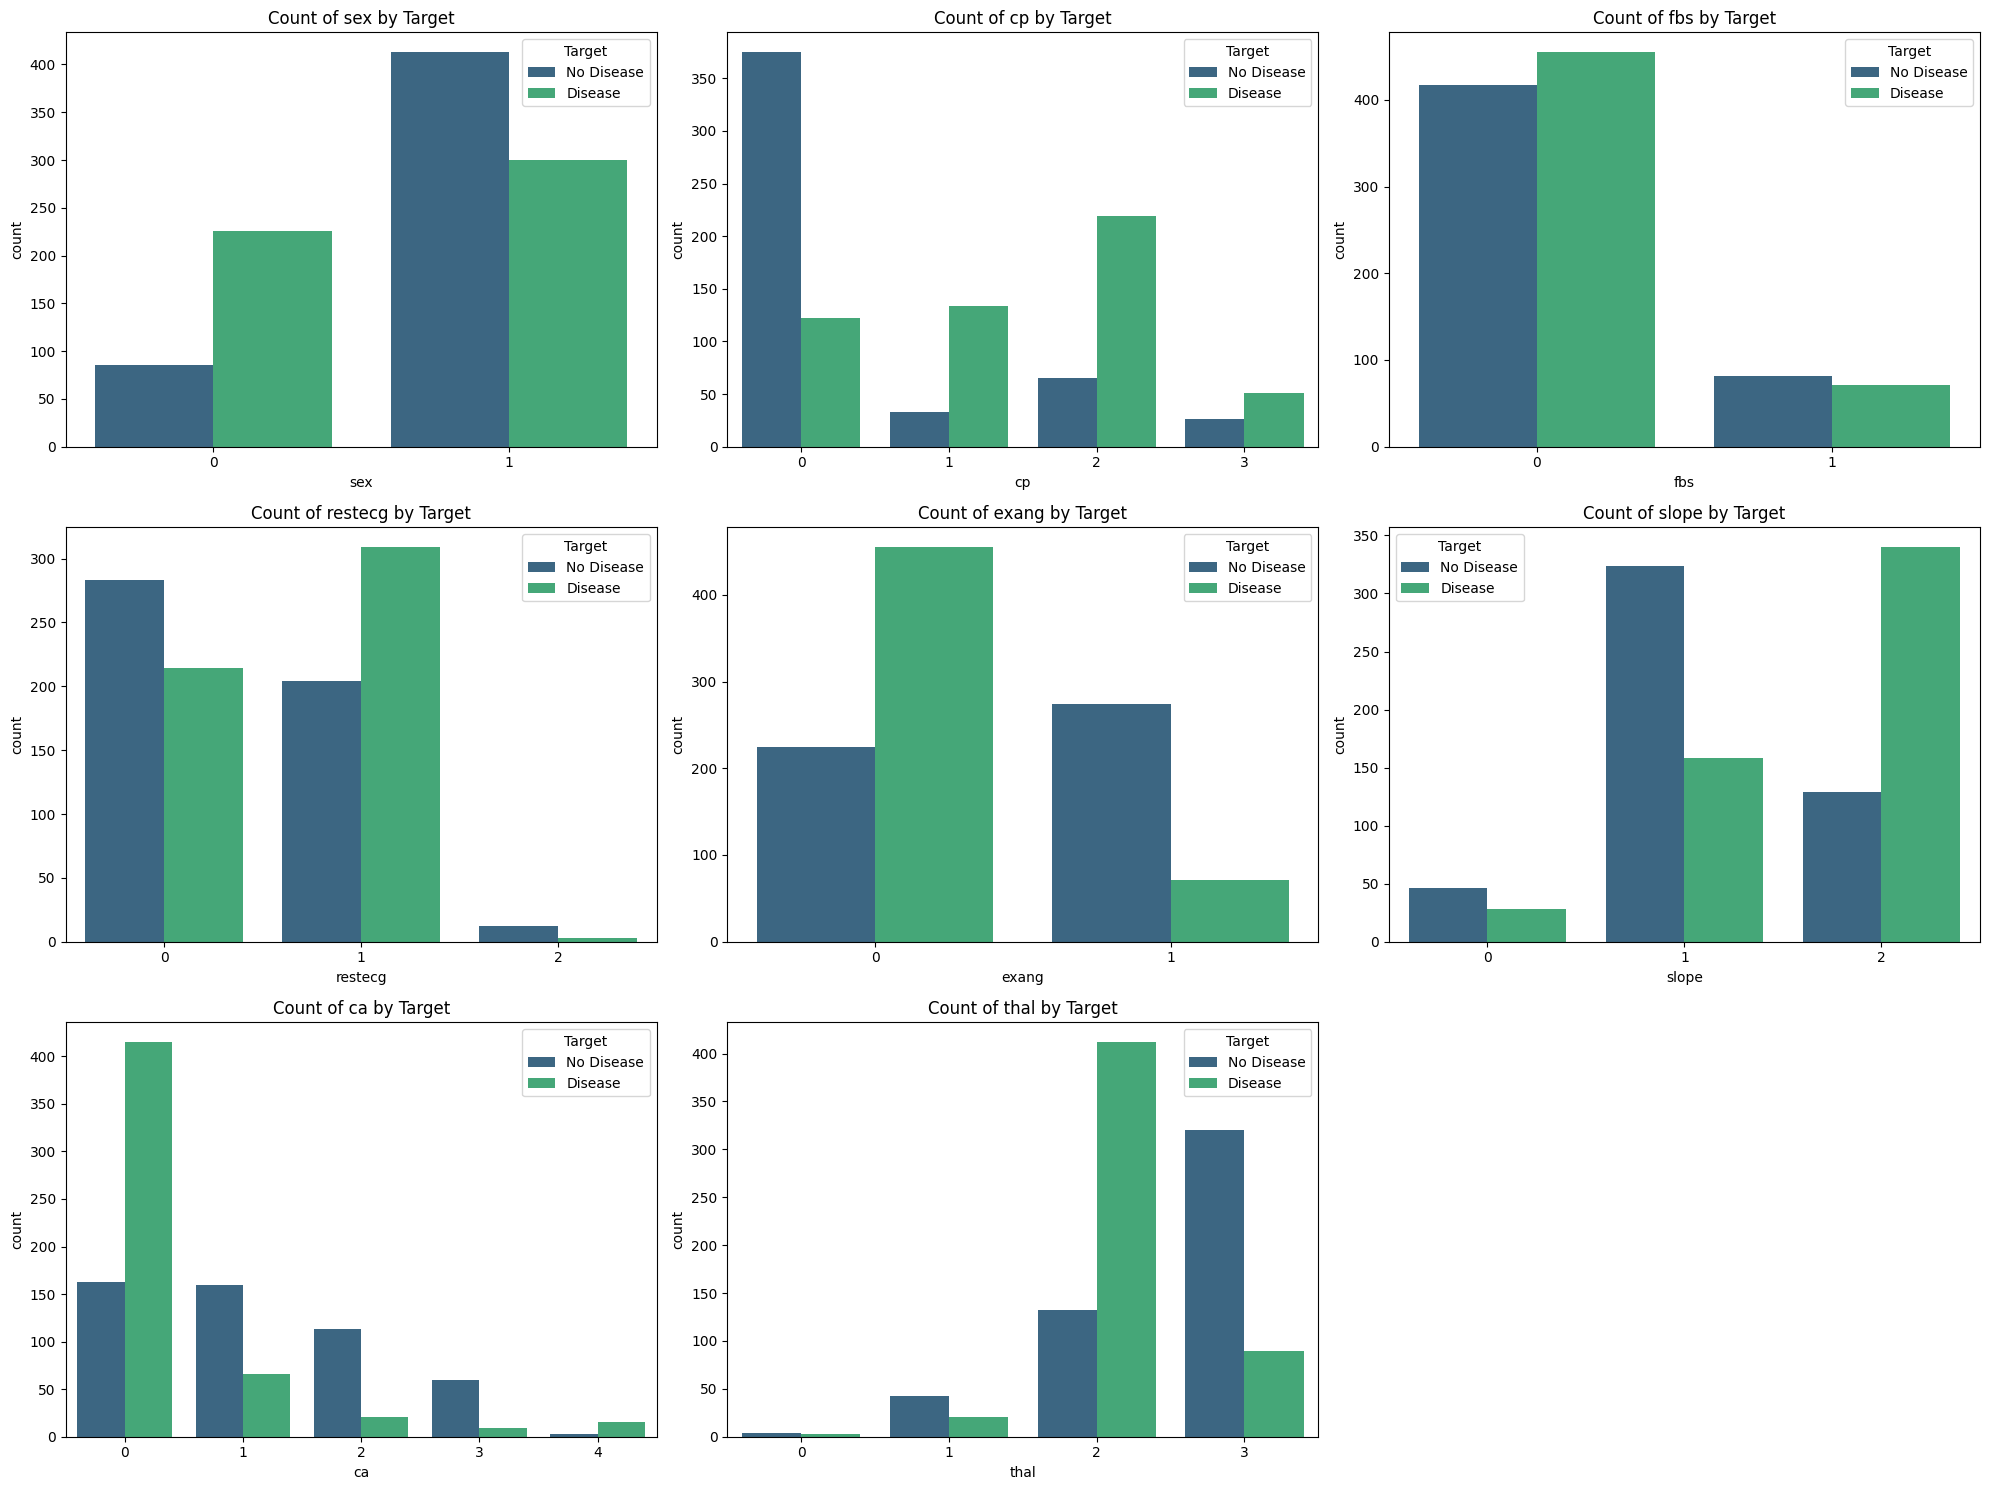

In [113]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='target', data=heart_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count of {feature} by Target')
    axes[i].legend(title='Target', labels=['No Disease', 'Disease'])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()